### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [23]:
data = pd.read_csv('coupons.csv')
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [24]:
# Identify columns with missing values
columns_with_null = data.columns[data.isna().any()]
print(f"Columns with missing values: {', '.join(columns_with_null)}")

Columns with missing values: car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50


3. Decide what to do about your missing data -- drop, replace, other...

In [25]:
# Drop rows with missing target
data = data.dropna(subset=["Y"])

# Fill 'car' explicitly
data["car"] = data["car"].fillna("do not drive")

# Fill numeric columns with median
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())

# Fill categorical columns with mode
cat_cols = data.select_dtypes(include="object").columns
for col in cat_cols:
    if data[col].isna().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])

# Verify cleanup
print(data.isna().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [27]:
acceptance_rate = data["Y"].mean()
print(f"Overall coupon acceptance rate: {acceptance_rate:.2%}")

Overall coupon acceptance rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

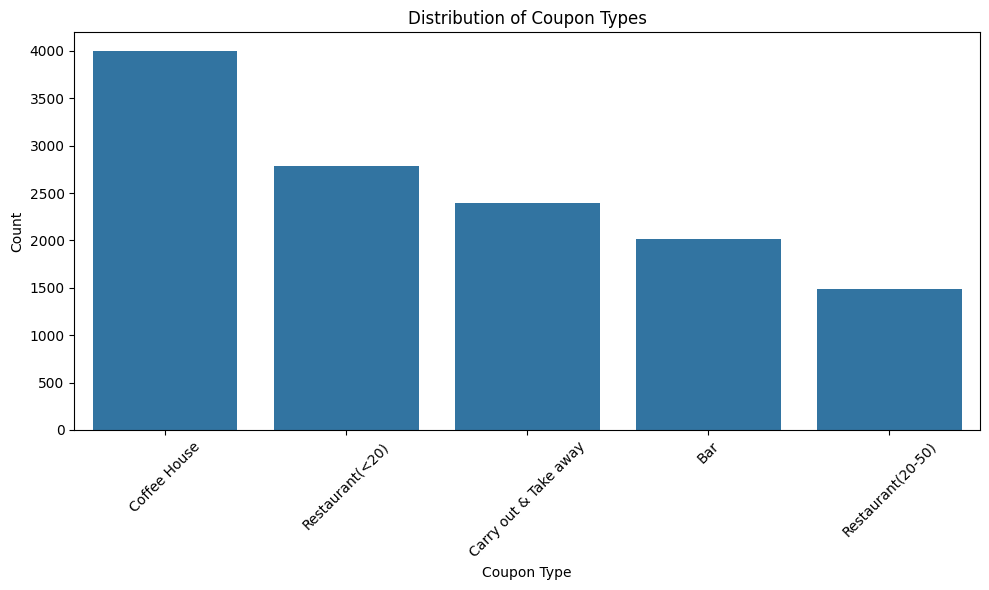

In [26]:
coupon_counts = data["coupon"].value_counts().reset_index()
coupon_counts.columns = ["coupon", "count"]

plt.figure(figsize=(10,6))
sns.barplot(data=coupon_counts, x="coupon", y="count")
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

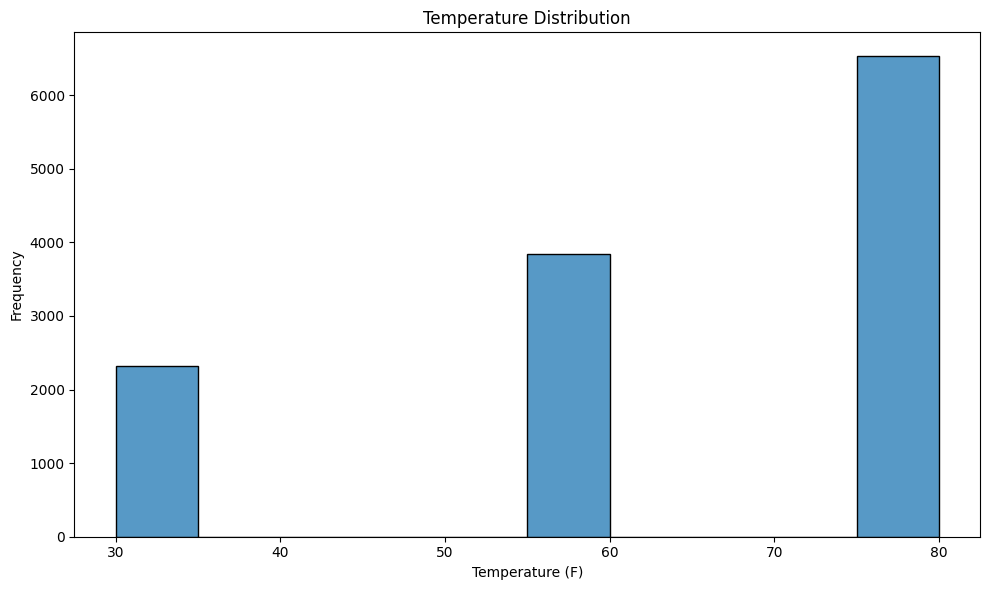

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(data["temperature"], bins=10)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
bar_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [30]:
proportion = (bar_df['Y'] == 1).mean()

print(f"The total observations chose to accept the coupon: {round(proportion * 100,2)}%")

The total observations chose to accept the coupon: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
# Convert bar frequency categories into numeric approximations
def map_bar_freq(x):
    x = str(x).lower().strip()
    if x == "never":
        return 0
    if "less1" in x:
        return 0.5
    if "1~3" in x:
        return 2
    if "4~8":
        return 6
    if "gt8" in x:
        return 10
    try:
        return float(x)
    except:
        return None

bar_df.loc[:, "bar_freq_num"] = bar_df["Bar"].apply(map_bar_freq)

# Split into groups: <=3 vs >3 times/month
group_le3 = bar_df[bar_df["bar_freq_num"] <= 3]
group_gt3 = bar_df[bar_df["bar_freq_num"] > 3]

# Calculate acceptance rates
accept_le3 = group_le3["Y"].mean()
accept_gt3 = group_gt3["Y"].mean()

print(f"Acceptance rate (≤3 times/month): {accept_le3:.3f}")
print(f"Acceptance rate (>3 times/month): {accept_gt3:.3f}")


Acceptance rate (≤3 times/month): 0.371
Acceptance rate (>3 times/month): 0.769


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [38]:
def age_midpoint(age_str):
    if not isinstance(age_str, str): return None
    v = age_str.strip().lower()
    if "below" in v and "21" in v: return 20
    import re
    m = re.search(r"(\d+)\s*to\s*(\d+)", v)
    if m:
        low, high = int(m.group(1)), int(m.group(2))
        return (low + high) / 2
    m2 = re.search(r"(\d+)", v)
    return float(m2.group(1)) if m2 else None

# --- Apply transformations ---
bar_df.loc[:, "bar_freq_num"] = bar_df["Bar"].apply(map_bar_freq)
bar_df.loc[:, "age_mid"] = bar_df["age"].apply(age_midpoint)

# Define group: bar >1/month AND age >25
group_mask = (bar_df["bar_freq_num"] > 1) & (bar_df["age_mid"] > 25)

# Acceptance rates
accept_group = bar_df.loc[group_mask, "Y"].mean()
accept_other = bar_df.loc[~group_mask, "Y"].mean()

print(f"Acceptance rate (bar >1/mo & age >25): {accept_group:.3f}")
print(f"Acceptance rate (all others): {accept_other:.3f}")


Acceptance rate (bar >1/mo & age >25): 0.695
Acceptance rate (all others): 0.335


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [41]:
def passenger_not_kid(p):
    return "kid" not in str(p).lower()

def occ_not_farm_fish_forest(o):
    o = str(o).lower()
    return not ("farm" in o or "fish" in o or "forestry" in o)

# --- Apply transformations ---
bar_df.loc[:, "bar_freq_num"] = bar_df["Bar"].apply(map_bar_freq)
bar_df.loc[:, "bar_gt1"] = bar_df["bar_freq_num"] > 1
bar_df.loc[:, "passenger_not_kid"] = bar_df["passanger"].apply(passenger_not_kid)
bar_df.loc[:, "occ_not_fff"] = bar_df["occupation"].apply(occ_not_farm_fish_forest)

# Define group: bar >1/month & passenger not kid & occ not farming/fishing/forestry
group_mask = bar_df["bar_gt1"] & bar_df["passenger_not_kid"] & bar_df["occ_not_fff"]

# Acceptance rates
accept_group = bar_df.loc[group_mask, "Y"].mean()
accept_other = bar_df.loc[~group_mask, "Y"].mean()

print(f"Acceptance rate (bar>1/mo, passenger not kid, occ not FFF): {accept_group:.3f}")
print(f"Acceptance rate (all others): {accept_other:.3f}")


Acceptance rate (bar>1/mo, passenger not kid, occ not FFF): 0.713
Acceptance rate (all others): 0.296


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [45]:
def income_lt_50k(s):
    if not isinstance(s, str): return False
    v = s.lower().replace(",", "")
    nums = [int(n) for n in re.findall(r"\d{4,6}", v)]
    if not nums: return "less than" in v
    return max(nums) < 50000

# --- Transformations ---
bar_df.loc[:, "bar_freq_num"] = bar_df["Bar"].apply(map_bar_freq)
bar_df.loc[:, "bar_gt1"] = bar_df["bar_freq_num"] > 1
bar_df.loc[:, "age_mid"] = bar_df["age"].apply(age_midpoint)
bar_df.loc[:, "under_30"] = bar_df["age_mid"] < 30
bar_df.loc[:, "passenger_not_kid"] = ~bar_df["passanger"].astype(str).str.lower().str.contains("kid")
bar_df.loc[:, "not_widowed"] = ~bar_df["maritalStatus"].astype(str).str.lower().str.contains("widowed")
bar_df.loc[:, "cheap_rest_freq"] = bar_df["RestaurantLessThan20"].apply(map_bar_freq)
bar_df.loc[:, "income_lt50k"] = bar_df["income"].apply(income_lt_50k)

# --- Conditions ---
condA = bar_df["bar_gt1"] & bar_df["passenger_not_kid"] & bar_df["not_widowed"]
condB = bar_df["bar_gt1"] & bar_df["under_30"]
condC = (bar_df["cheap_rest_freq"] > 4) & bar_df["income_lt50k"]

combined = condA | condB | condC

# --- Acceptance rates ---
accept_condA = bar_df.loc[condA, "Y"].mean()
accept_condB = bar_df.loc[condB, "Y"].mean()
accept_condC = bar_df.loc[condC, "Y"].mean()
accept_combined = bar_df.loc[combined, "Y"].mean()
accept_others = bar_df.loc[~combined, "Y"].mean()

print(f"Acceptance rate (Condition A): {accept_condA:.3f}")
print(f"Acceptance rate (Condition B): {accept_condB:.3f}")
print(f"Acceptance rate (Condition C): {accept_condC:.3f}")
print(f"Acceptance rate (Combined A or B or C): {accept_combined:.3f}")
print(f"Acceptance rate (Others): {accept_others:.3f}")

Acceptance rate (Condition A): 0.713
Acceptance rate (Condition B): 0.722
Acceptance rate (Condition C): 0.453
Acceptance rate (Combined A or B or C): 0.589
Acceptance rate (Others): 0.298


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accepted bar coupons tend to be younger or middle-aged adults who already visit bars regularly, travel with adult passengers, and have occupations and lifestyles aligned with social or urban settings. They are often budget-conscious, making them more responsive to discounts. In short, bar coupon acceptance is strongest among socially active, frequent bar-goers who value savings and convenience.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [46]:
# Focus only on Coffee House coupons
coffee_df = data[data["coupon"].str.lower() == "coffee house"].copy()

def passenger_not_kid(p):
    return "kid" not in str(p).lower()

# Acceptance rate overall
accept_overall = coffee_df["Y"].mean()

# Acceptance by passenger type
coffee_df.loc[:, "passenger_not_kid"] = coffee_df["passanger"].apply(passenger_not_kid)
accept_not_kid = coffee_df.loc[coffee_df["passenger_not_kid"], "Y"].mean()
accept_kid = coffee_df.loc[~coffee_df["passenger_not_kid"], "Y"].mean()

# Acceptance by coffee frequency (>1/month vs ≤1/month)
coffee_df.loc[:, "coffee_freq_num"] = coffee_df["CoffeeHouse"].apply(map_bar_freq)
accept_gt1 = coffee_df.loc[coffee_df["coffee_freq_num"] > 1, "Y"].mean()
accept_le1 = coffee_df.loc[coffee_df["coffee_freq_num"] <= 1, "Y"].mean()

print(f"Overall Coffee House acceptance: {accept_overall:.3f}")
print(f"Passenger not kid: {accept_not_kid:.3f}")
print(f"Passenger kid: {accept_kid:.3f}")
print(f"Coffee >1/mo: {accept_gt1:.3f}")
print(f"Coffee ≤1/mo: {accept_le1:.3f}")


Overall Coffee House acceptance: 0.499
Passenger not kid: 0.500
Passenger kid: 0.483
Coffee >1/mo: 0.660
Coffee ≤1/mo: 0.350


**Findings: Coffee House Coupon Acceptance**

*Problem Statement*

This analysis examines Coffee House coupon acceptance behavior, with the objective of identifying demographic and behavioral characteristics associated with higher likelihood of coupon redemption. Understanding these differences enables more targeted and efficient coupon distribution strategies.

*Descriptive Findings*

Overall acceptance of Coffee House coupons is 49.9%, indicating a near-even split between acceptance and rejection across the population.

Key segmentation results reveal meaningful variation:

*Passenger Type*

Passengers not traveling with kids show a slightly higher acceptance rate (50.0%) compared to those traveling with kids (48.3%).

While the difference is modest, it suggests that family presence may marginally reduce spontaneous coffee-related decisions.

*Coffee Consumption Frequency*

Individuals who visit coffee houses more than once per month exhibit a substantially higher acceptance rate (66.0%).

In contrast, those visiting once per month or less show significantly lower acceptance (35.0%).

This represents the strongest observed effect and highlights consumption frequency as a primary driver of acceptance.

*Interpretation*

The results indicate that habitual coffee consumers are nearly twice as likely to accept Coffee House coupons compared to infrequent consumers. Passenger composition has a comparatively minor effect, suggesting that behavioral preferences outweigh situational factors in coupon acceptance decisions for this category.

These findings are consistent with consumer behavior theory, where habitual purchasing patterns strongly influence responsiveness to promotions.

*Actionable Insights*

Targeting Strategy: Prioritize Coffee House coupons for users with demonstrated high coffee visit frequency.

Personalization: Consider deprioritizing coupon delivery to infrequent coffee drinkers, or pairing coupons with stronger incentives.

Context Awareness: While passenger type is not a dominant factor, messaging could be subtly adapted for non-family travel contexts.

*Next Steps and Recommendations*

Conduct inferential statistical testing (e.g., chi-square test or logistic regression) to confirm whether observed differences are statistically significant.

Develop visualizations (bar charts of acceptance rates by coffee frequency and passenger type) to support exploratory insights.

Extend analysis to compare Coffee House coupons with other coupon categories to determine whether frequency-driven behavior generalizes across domains.

# Task
Investigate the `data` DataFrame by checking for null values in each column, examining the data types, and counting the unique values for each column.

## Check for null values

### Subtask:
Identify columns with missing data and the number of nulls in each.


**Reasoning**:
To identify columns with missing data and count the number of nulls in each, I will use the `.isnull().sum()` methods on the `data` DataFrame.



In [ ]:
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


## Examine data types

### Subtask:
Review the data types of each column to ensure they are appropriate.


**Reasoning**:
To review the data types of each column, I will use the `.info()` method on the `data` DataFrame, which provides a concise summary including column names, non-null counts, and data types.



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

## Count unique values in each column

### Subtask:
Analyze the unique values in each column to spot inconsistencies or unexpected entries, especially for categorical data.


## Summary:

### Data Analysis Key Findings

*   **Null Values:** Six columns were identified with missing values:
    *   `car`: 12,576 null values
    *   `Bar`: 107 null values
    *   `CoffeeHouse`: 217 null values
    *   `CarryAway`: 151 null values
    *   `RestaurantLessThan20`: 130 null values
    *   `Restaurant20To50`: 189 null values
*   **Data Types:**
    *   There are 8 numerical columns (`int64`), including `temperature`, `has_children`, and `Y`, which appear appropriate.
    *   18 columns are of `object` type, such as `destination`, `passanger`, `weather`, `time`, `coupon`, and several restaurant/bar-related columns. Some of these (`car`, `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, `Restaurant20To50`) also contain null values.

### Insights or Next Steps

*   The identified missing values in `car`, `Bar`, `CoffeeHouse`, `CarryAway`, `RestaurantLessThan20`, and `Restaurant20To50` columns will need to be addressed through imputation, removal, or specific handling strategies before further analysis.
*   Columns like `time` and `expiration`, currently stored as `object` type, should be converted to datetime objects to enable time-based analysis and calculations.
